In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Extracting data

In [141]:
import glob

In [142]:
glob.glob(r'D:\individual_stocks_5yr\individual_stocks_5yr/*csv')
# list of all csv files from that location what i have mentioned.

['D:\\individual_stocks_5yr\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ADI_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ADM_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ADP_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ADSK_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\ADS_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\AEE_data.csv',
 'D:\\individual_stocks_5yr\\individual_stocks_5yr\\AEP_da

In [143]:
len(glob.glob(r'D:\individual_stocks_5yr\individual_stocks_5yr/*csv'))

508

In [144]:
company_list=[
           r'D:\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv',
           r'D:\\individual_stocks_5yr\\individual_stocks_5yr\\AMZN_data.csv',
           r'D:\\individual_stocks_5yr\\individual_stocks_5yr\\GOOG_data.csv',
           r'D:\\individual_stocks_5yr\\individual_stocks_5yr\\MSFT_data.csv'
]

In [145]:
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(file)
    all_data=current_df.append(all_data,ignore_index=True)


In [146]:
len(all_data)

4752

In [147]:
all_data.shape

(4752, 7)

In [148]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [149]:
# Transforming data

In [150]:
# what was the change in price of the stock overtime?

In [151]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [152]:
all_data.isnull().sum()  # we can see that there is no missing values

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [153]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [154]:
all_data['date']=pd.to_datetime(all_data['date'])  # converting datatypes of 'data' into datetime64[ns]

In [155]:
tech_list=all_data['Name'].unique()

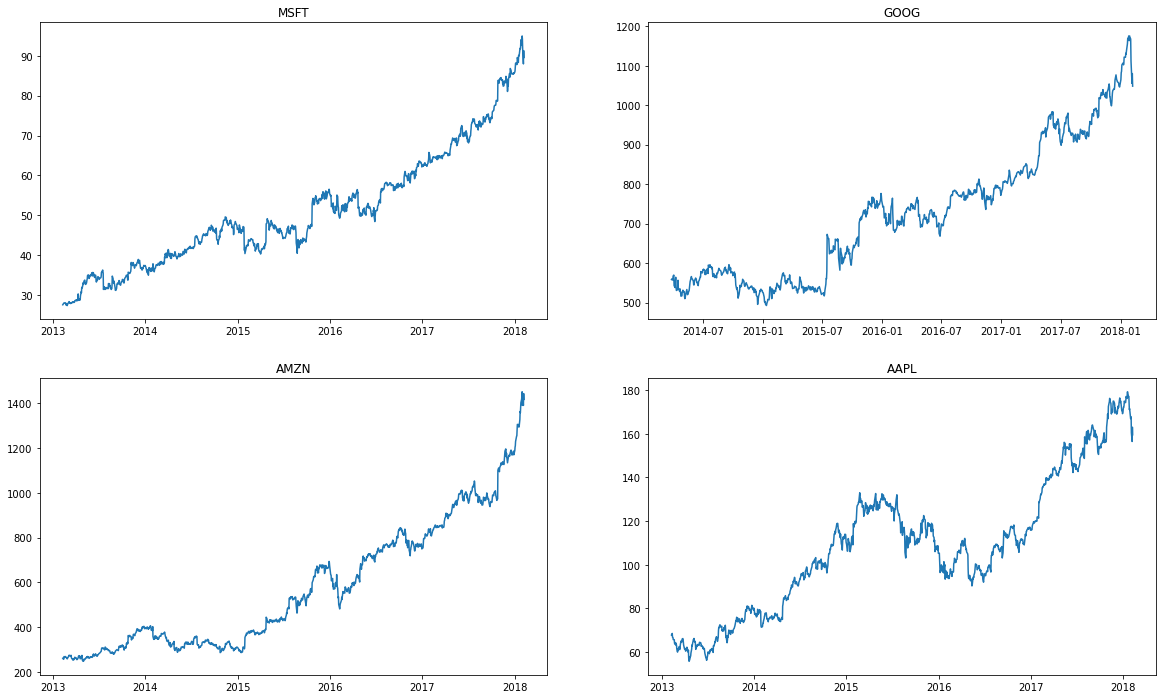

In [156]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)
    

In [157]:
# What was the moving average of the various stocks?

In [158]:
all_data['close'].rolling(window=10).mean().head(15)  # moving average of first 10 values

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
Name: close, dtype: float64

In [159]:
new_data=all_data.copy()

In [160]:
ma_day=[10,20,50]
for ma in ma_day:
    new_data["close_"+str(ma)]=new_data['close'].rolling(ma).mean()
    

In [161]:
new_data.head()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,NaN,NaN,NaN
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,NaN,NaN,NaN
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,NaN,NaN,NaN


In [162]:
new_data.set_index('date',inplace=True)

In [163]:
new_data.head()

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,NaN,NaN,NaN


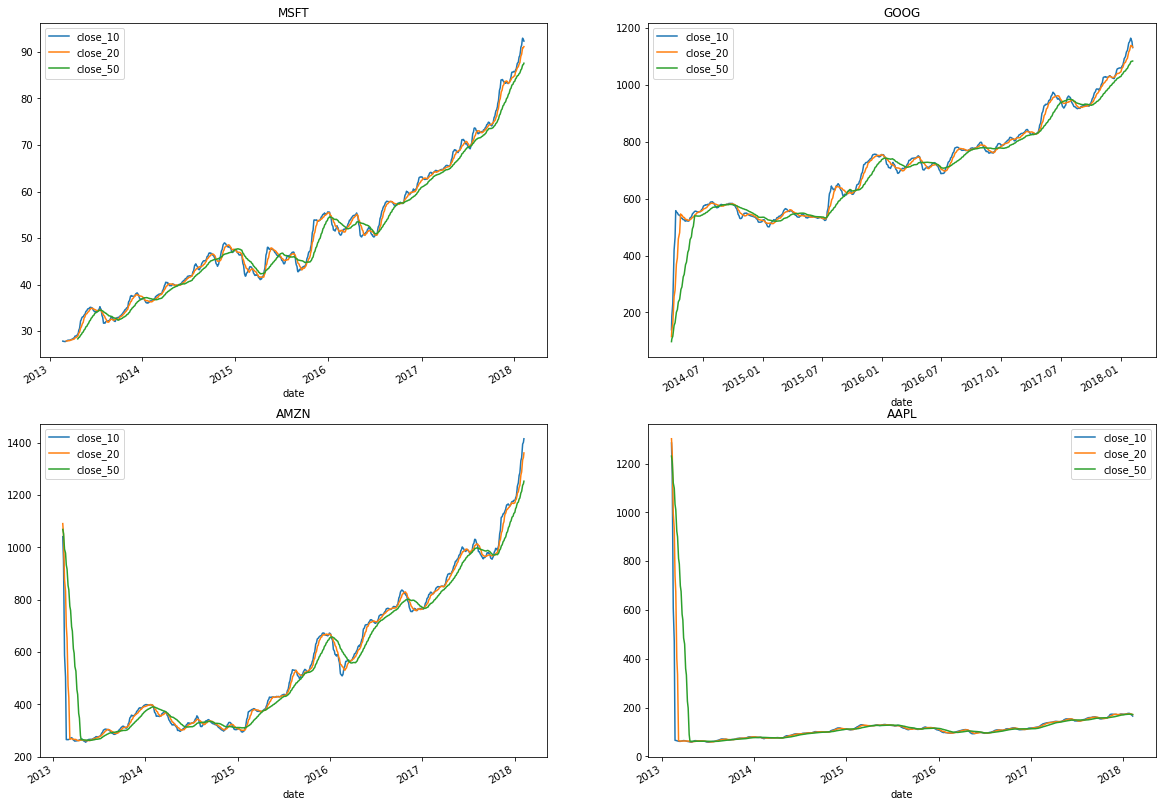

In [164]:
plt.figure(figsize=(20,15))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)
    

In [165]:
# Closing price change in Apple stock

In [166]:
company_list

['D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [167]:
apple=pd.read_csv(r'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [168]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [169]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [170]:
apple['Daily return(in %)']=apple['close'].pct_change()*100  # percentage of day to day increment

In [171]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [172]:
import plotly.express as px

In [173]:
px.line(apple,x='date',y='Daily return(in %)')

In [174]:
# performing resampling analysis of closing price

In [175]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [176]:
apple['date']=pd.to_datetime(apple['date'])  # converting data of 'date' into date-time formats

In [177]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [178]:
apple.set_index('date',inplace=True)

In [179]:
apple.head()

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [180]:
apple['close'].resample('M').mean()  # monthly average closing price 

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

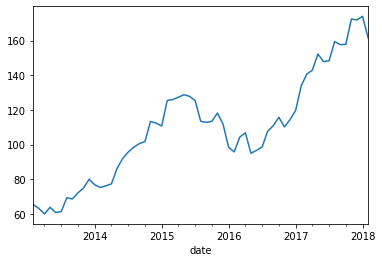

In [181]:
apple['close'].resample('M').mean().plot()

In [182]:
apple['close'].resample('Y').mean()  # yearly average closing price

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

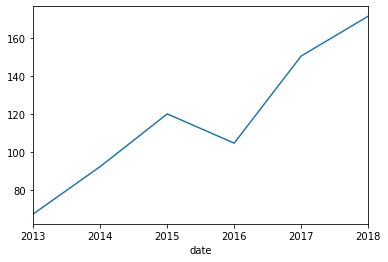

In [183]:
apple['close'].resample('Y').mean().plot()

In [184]:
apple['close'].resample('Q').mean()  # quaterly average closing price

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

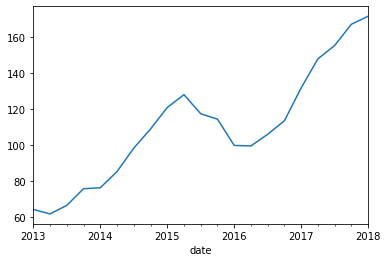

In [185]:
apple['close'].resample('Q').mean().plot()

In [186]:
# checking closing prices of these tech companies (Amazon,Apple,Google ,Microsoft) are correlated or not

In [187]:
company_list

['D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [188]:
app=pd.read_csv(company_list[0])
amzn=pd.read_csv(company_list[1])
google=pd.read_csv(company_list[2])
msft=pd.read_csv(company_list[3])

In [206]:
closing_price=pd.DataFrame()

In [207]:
closing_price['app_close']=app['close']
closing_price['amzn_close']=amzn['close']
closing_price['google_close']=google['close']
closing_price['msft_close']=msft['close']

In [208]:
closing_price

,app_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


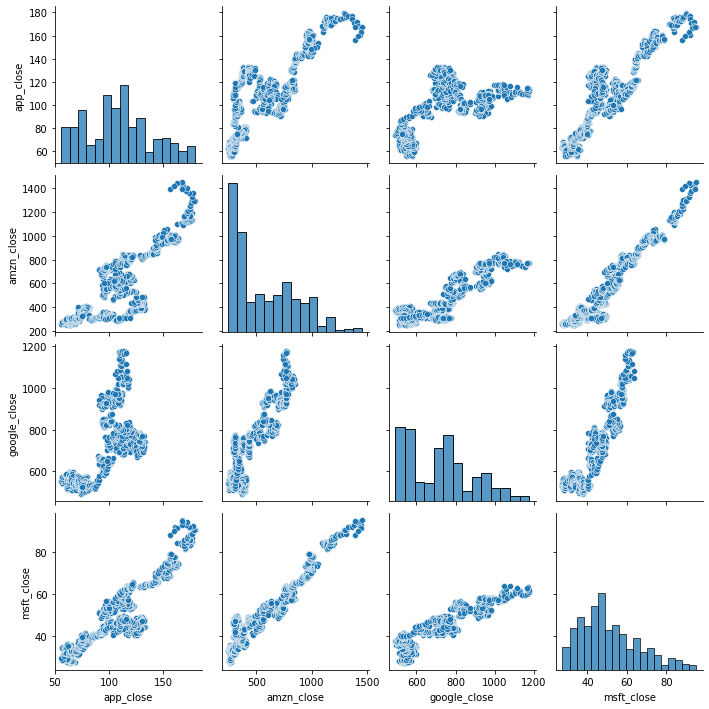

In [209]:
sns.pairplot(closing_price)  #  correlation between each pairs

In [210]:
closing_price.corr()

,app_close,amzn_close,google_close,msft_close
app_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<AxesSubplot:>

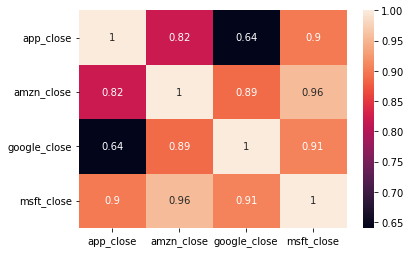

In [211]:
sns.heatmap(closing_price.corr(),annot=True)   # correlation through visualization

In [212]:
# whether daily changes of closing prices of the stocks or daily return in stock are correlated or not 

In [213]:
closing_price['app_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: app_close, Length: 1259, dtype: float64

In [214]:
closing_price['app_close'].shift(1)  # shifting with one row

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: app_close, Length: 1259, dtype: float64

In [215]:
((closing_price['app_close']-closing_price['app_close'].shift(1))/closing_price['app_close'])*100 
                               # percentage of day to day increment for apple closing date price

0            NaN
1       1.031484
2      -2.571107
3      -0.190660
4      -0.090015
          ...   
1254    0.208607
1255   -4.535826
1256   -2.562464
1257    4.011532
1258   -2.187539
Name: app_close, Length: 1259, dtype: float64

In [216]:
for col in closing_price.columns:
    closing_price[col+'_pct_change']=((closing_price[col]-closing_price[col].shift(1))/closing_price[col])*100 
    

In [217]:
closing_price.head()

,app_close,amzn_close,google_close,msft_close,app_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.031484,-1.842852,0.273219,1.112706
2,66.8428,258.70,556.97,27.88,-2.571107,0.575957,-0.542220,0.071736
3,66.7156,269.47,567.16,28.03,-0.190660,3.996734,1.796671,0.535141
4,66.6556,269.24,567.00,28.04,-0.090015,-0.085426,-0.028219,0.035663


In [218]:
closing_price.columns

Index(['app_close', 'amzn_close', 'google_close', 'msft_close',
       'app_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [219]:
closing_p=closing_price[['app_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change']]

In [220]:
closing_p.head()

,app_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.031484,-1.842852,0.273219,1.112706
2,-2.571107,0.575957,-0.542220,0.071736
3,-0.190660,3.996734,1.796671,0.535141
4,-0.090015,-0.085426,-0.028219,0.035663


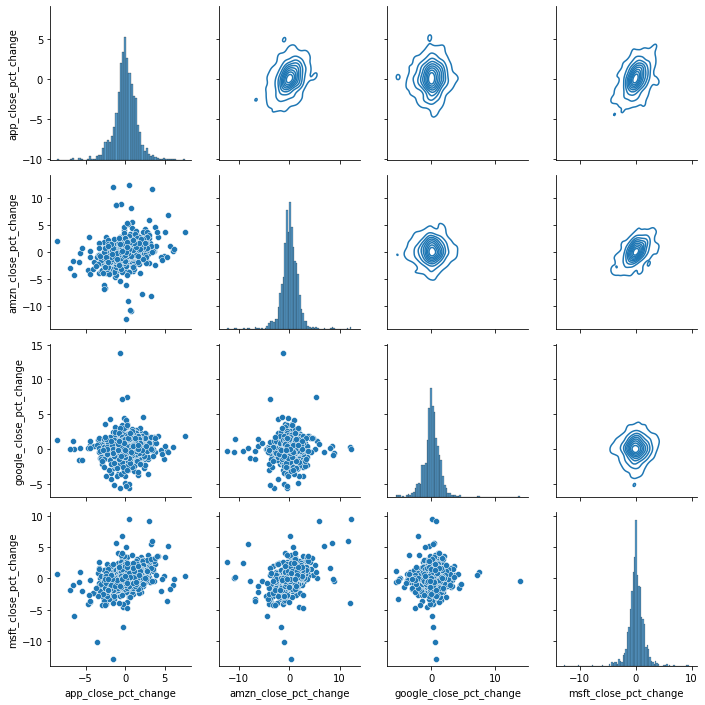

In [227]:
g=sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)


In [229]:
closing_p.corr() 


,app_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
app_close_pct_change,1.000000,0.289184,0.037044,0.368796
amzn_close_pct_change,0.289184,1.000000,0.030146,0.388924
google_close_pct_change,0.037044,0.030146,1.000000,0.040174
msft_close_pct_change,0.368796,0.388924,0.040174,1.000000


In [ ]:
#     correlation between amzn_close_pct_change and msft_close_pct_change is high. and it is postively correlated